In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Load the preprocessed dataset
file_path = 'preprocessed_scorecard_data.csv'
dataset = pd.read_csv(file_path, low_memory=False)


In [32]:
# Ensure all columns are numeric
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset = dataset[numeric_cols]

# Impute any remaining missing values
imputer = SimpleImputer(strategy='median')
dataset[numeric_cols] = imputer.fit_transform(dataset[numeric_cols])

# Define features and target variable
X = dataset.drop(columns=['repayment_rate_high'])
y = dataset['repayment_rate_high']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),  # Increased max_iter to 5000
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [39]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

In [40]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.776768   0.790795  0.607717  0.687273  0.824252
Random Forest        0.999351   1.000000  0.998392  0.999195  1.000000
Gradient Boosting    1.000000   1.000000  1.000000  1.000000  1.000000


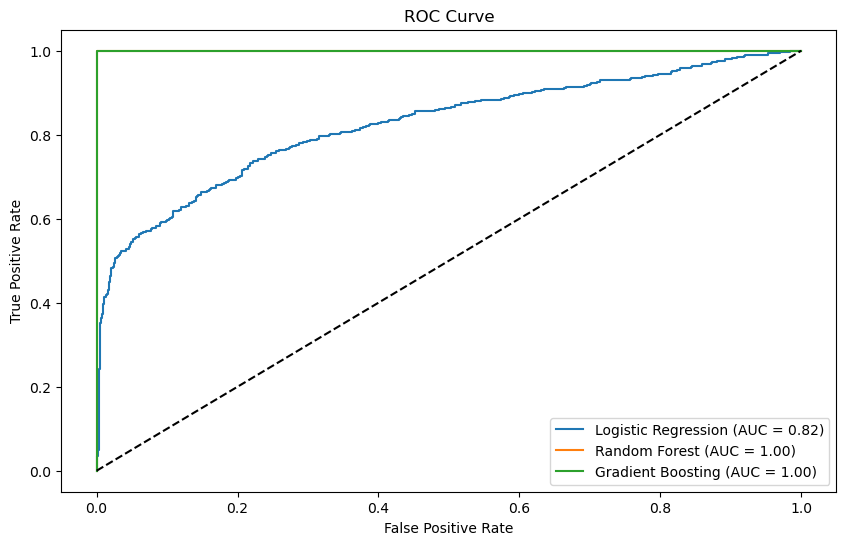

In [41]:
import matplotlib.pyplot as plt
# Plot ROC curves
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()